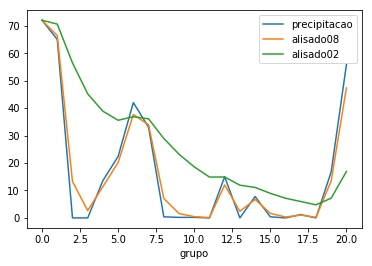

In [77]:
import pandas as pd
chuva = pd.read_csv("http://www.ime.unicamp.br/~gvludwig/2018s2-me315/INMET-14JAN2018-14AUG2018-SOROCABA.csv")
chuva.loc[:,'precipitacao'] = chuva['precipitacao'].apply(pd.to_numeric, errors = 'coerce')
chuva['data'] = pd.to_datetime(chuva['data'], dayfirst = True)
chuvaDiaria = chuva[['data','precipitacao']].groupby('data').sum().reset_index()

def group10(x):
    datas = pd.date_range(start = '2018-01-15', end = '2018-08-13', freq = '10D')
    for i in range(0, len(datas)-1): # Only need to check until before last day
        if ((x >= datas[i]) & (x < datas[i+1])): # Matching types!
            return i
        else:
             pass
    return float('NaN')

chuvaDiaria['grupo'] = chuvaDiaria['data'].apply(func = group10)
chuvaDiaria = chuvaDiaria.dropna()
chuvaAgrupada = chuvaDiaria[['grupo','precipitacao','data']].groupby('grupo').sum().reset_index()

def alis_exp(x, alpha = 0.2):
    if (alpha <= 0.0) | (alpha >= 1.0):
        raise ValueError("alpha must be a number between 0 and 1.")
    ae = []
    ae.append(x[0])
    for i in x[1:]:
        ae.append(alpha*i +(1-alpha) * ae[-1]) 
    return ae 

chuvaAgrupada['alisado02'] = alis_exp(chuvaAgrupada['precipitacao'], 0.2)
chuvaAgrupada['alisado08'] = alis_exp(chuvaAgrupada['precipitacao'], 0.8)
import matplotlib.pyplot as plt
chuvaAgrupada.plot(x = 'grupo', y = ['precipitacao','alisado08','alisado02'])
plt.show()